In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from scipy.io import loadmat
import random as rand

In [15]:
import nnScript


(10000L, 784L)
(10000L, 1L)

(60000L, 784L)
(60000L, 1L)
done preprocessing


ValueError: zero-size array to reduction operation maximum which has no identity

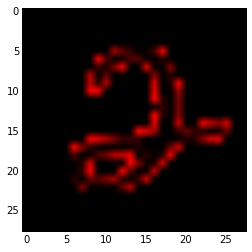

In [10]:


mat = loadmat('mnist_all.mat')
test0 = mat['train2']
singleNum = test0[1]
singleNum = singleNum.reshape(28,28)

img = zeros((28,28,3))
img[:,:, 0] = singleNum
imshow(img)

In [7]:
mat

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Nov 10 17:52:46 2005',
 '__version__': '1.0',
 'test0': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test1': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test2': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test3': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],


1. Stack all training matrices into one 60000 × 784 matrix. Do the same for test matrices.
2. Create a 60000 length vector with true labels (digits) for each training example. Same for test data.
3. Normalize the training matrix and test matrix so that the values are between 0 and 1.
4. Randomly split the 60000 × 784 normalized matrix into two matrices: training matrix (50000 × 784)
and validation matrix (10000 × 784). Make sure you split the true labels vector into two parts as well.
5. Feature selection - see next subsection

In [86]:
mat = loadmat('mnist_all.mat')
test0 = mat['test0']


(784L,)


In [34]:
concatenate?

In [238]:
mat = loadmat('mnist_all.mat')

train_data = empty((50000,784))
train_label = empty((50000,1))
validation_data = empty((10000,784))
validation_label = empty((10000, 1))
test_data = empty((0,784))
test_label = empty((0,1))
    
    
#testing = empty((0,784))
#testing_label = empty((0,1))
training = empty((0,784))
training_label = empty((0,1))
test = "test"
for i in xrange(10):
    testArr = mat[test + str(int(i))]
    length = len(testArr)
    labels = ones((length, 1)) * i
    test_label = concatenate((test_label, labels))
    test_data = concatenate((test_data, testArr))
print "\n", test_data.shape
print testing_label.shape

train = "train"
for i in xrange(10):
    trainArr = mat[train + str(int(i))]
    length = len(trainArr)
    labels = ones((length, 1)) * i
    training = concatenate((training, trainArr))
    training_label = concatenate((training_label, labels))
print "\n", training.shape
print training_label.shape

test_data = test_data/255
training = training/255  

#testing = concatenate((testing, testing_label), axis = 1)
#training = concatenate((training, training_label), axis = 1)
#print "\n", testing.shape
#print training.shape


    


(10000L, 784L)
(10000L, 1L)

(60000L, 784L)
(60000L, 1L)


In [239]:
training_indecies = rand.sample(xrange(60000), 50000)
training_indecies = sorted(training_indecies)
validation_indecies = []
offset = 0
try:
    for i in range(60000):
        if training_indecies[i - offset] != i:
            offset += 1
            validation_indecies.append(i)
except:
    #print i
    #print training_indecies
    #print validation_indecies
    for x in range(i, 60000):
        validation_indecies.append(x)
print "done"
#print training_indecies
#print validation_indecies

done


In [240]:
#get data into return arrays
#train_data
#train_label
#validation_data
#validation_label

for i in range(50000):
    new_data = training[training_indecies[i]].reshape(1,784)
    new_label = training_label[training_indecies[i]].reshape(1,1)
    train_data[i] = new_data
    train_label[i] = new_label

for i in range(10000):
    new_data = training[validation_indecies[i]].reshape(1,784)
    new_label = training_label[validation_indecies[i]].reshape(1,1)
    validation_data[i] = new_data
    validation_label[i] = new_label
print "done preprocessing"


done


In [224]:
a = array([1,2,3])
b = array([4,5,6])
ab = zeros((2,3))
ab[0] = a
ab[1] = b
print ab

[[ 1.  2.  3.]
 [ 4.  5.  6.]]


In [17]:
preprocess

NameError: name 'preprocess' is not defined

In [30]:
def preprocess():
    """ Input:
     Although this function doesn't have any input, you are required to load
     the MNIST data set from file 'mnist_all.mat'.

     Output:
     train_data: matrix of training set. Each row of train_data contains 
       feature vector of a image
     train_label: vector of label corresponding to each image in the training
       set
     validation_data: matrix of training set. Each row of validation_data 
       contains feature vector of a image
     validation_label: vector of label corresponding to each image in the 
       training set
     test_data: matrix of training set. Each row of test_data contains 
       feature vector of a image
     test_label: vector of label corresponding to each image in the testing
       set

     Some suggestions for preprocessing step:
     - divide the original data set to training, validation and testing set
           with corresponding labels
     - convert original data set from integer to double by using double()
           function
     - normalize the data to [0, 1]
     - feature selection"""
    
    mat = loadmat('mnist_all.mat')

    train_data = np.empty((50000,784))
    train_label = np.empty((50000,1))
    validation_data = np.empty((10000,784))
    validation_label = np.empty((10000, 1))
    test_data = np.empty((0,784))
    test_label = np.empty((0,1))


    #testing = empty((0,784))
    #testing_label = empty((0,1))
    training = np.empty((0,784))
    training_label = np.empty((0,1))
    test = "test"
    for i in xrange(10):
        testArr = mat[test + str(int(i))]
        length = len(testArr)
        labels = np.ones((length, 1)) * i
        test_label = np.concatenate((test_label, labels))
        test_data = np.concatenate((test_data, testArr))
    print "\n", test_data.shape
    print test_label.shape

    train = "train"
    for i in xrange(10):
        trainArr = mat[train + str(int(i))]
        length = len(trainArr)
        labels = np.ones((length, 1)) * i
        training = np.concatenate((training, trainArr))
        training_label = np.concatenate((training_label, labels))
    print "\n", training.shape
    print training_label.shape

    test_data = test_data/255
    training = training/255
    
    training_indecies = rand.sample(xrange(60000), 50000)
    training_indecies = sorted(training_indecies)
    validation_indecies = []
    offset = 0
    try:
        for i in range(60000):
            if training_indecies[i - offset] != i:
                offset += 1
                validation_indecies.append(i)
    except:
        #print i
        #print training_indecies
        #print validation_indecies
        for x in range(i, 60000):
            validation_indecies.append(x)
            

    for i in range(50000):
        new_data = training[training_indecies[i]].reshape(1,784)
        new_label = training_label[training_indecies[i]].reshape(1,1)
        train_data[i] = new_data
        train_label[i] = new_label

    for i in range(10000):
        new_data = training[validation_indecies[i]].reshape(1,784)
        new_label = training_label[validation_indecies[i]].reshape(1,1)
        validation_data[i] = new_data
        validation_label[i] = new_label
    print "done preprocessing"
    
    print train_data, "\n\n", train_label, "\n\n", validation_data, "\n\n", validation_label, "\n\n", test_data, "\n\n", test_label
    return train_data, train_label, validation_data, validation_label, test_data, test_label
 

In [31]:
preprocess()


(10000L, 784L)
(10000L, 1L)

(60000L, 784L)
(60000L, 1L)
done preprocessing
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 9.]
 [ 9.]
 [ 9.]] 

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 9.]
 [ 9.]
 [ 9.]] 

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 9.]
 [ 9.]
 [ 9.]]


(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), array([[ 0.],
        [ 0.],
        [ 0.],
        ..., 
        [ 9.],
        [ 9.],
        [ 9.]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), array([[ 0.],
        [ 0.],
        [ 0.],
        ..., 
        [ 9.],
        [ 9.],
        [ 9.]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..

In [58]:
def sigmoid(z):
    """# Notice that z can be a scalar, a vector or a matrix
    # return the sigmoid of input z"""
    
    return  1/(1.0+math.e**-z) #your code here

In [59]:
def feedforward_prop(input_array, w1, w2, n_hidden, n_class): #for a single training/validation/test entry
    a_array = np.zeros((n_hidden))
    z_array = np.zeros((n_hidden))
    b_array = np.zeros((n_class))
    o_array = np.zeros((n_class))
    #calculate a_array values
    for j in xrange(n_hidden):
        for i in xrange(len(input_array + 1)):
            a_array[j] += w1[j,i]*input_array[i]
    #for j in range(n_hidden):
    z_array = sigmoid(a_array)
    
    for l in range(n_class):
        for j in range(n_hidden):
            b_array[l] += w2[l,j]*z_array[j]
    o_array = sigmoid(b_array)
    return o_array, z_array

In [60]:
#test feedforward_prop
w1 = array([[.1,.4],[.2,.5],[.3,.6]])
w2 = array([[.1,.3,.5],[.2,.4,.6]])
input_array = array([.2,.4])
n_hidden = 3
n_class = 2
feedforward_prop(input_array, w1, w2, n_hidden, n_class)
#IT WORKS!!!

(array([ 0.62471815,  0.66318647]),
 array([ 0.54487889,  0.55971365,  0.57444252]))

In [35]:
preprocess()


0.5249791874789399

In [31]:
def error_func(output_array, y, n_class):
    yp = np.array([y == i for i in range(n_class)], dtype = int)
    return .5*sum((yp - output_array)**2)
    

In [48]:
np.array?

In [38]:
y = 8
output_array = array([0,0,0,0,0,1,0,0,0,0])
yp = np.array([y == i for i in range(10)], dtype = float)
print error_func(output_array, y, 10)

1.0


In [69]:
def calc_delta(y, output_array, n_class):
    yp = np.array([y == i for i in range(n_class)], dtype = int)
    delta = (yp - output_array)*(1-output_array)*output_array
    return delta
    #print "yp = ", yp
    #print "OA = ", output_array
    #print "yp-oa =", yp - output_array
    #print "1 - OA = ", 1 - output_array
    #print (yp - output_array)*(1-output_array)
    #print (yp - output_array)*(1-output_array)*output_array

def calc_grad2(z_array, n_class):
    #J_grad = zeros((len(input_array), n_class))
    delta = calc_delta(y,output_array, n_class)
    J_grad2 =  array([-1 * delta[l] * z_array[j] for l in xrange(n_class) for j in xrange(len(z_array))]) 
    return J_grad2

def calc_grad1(input_array, w2, delta, n_class):
    j_grad1 = array([-(1-z_array[j]*z_array[j]*sum(delta*w2[j])*input_array[i]) for j in xrange(len(input_array)) for i in xrange(len(input_array))])
    

In [67]:
y = 8
yp = np.array([y == i for i in range(10)], dtype = float)
output_array = array([0,0,0,0,0,1,0,0,0,0])
calc_delta(y, output_array, 10)
print - calc_delta(y, output_array,10) * yp


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [68]:
a = np.array([1,2,3])
b = np.array([[4,5,6],[1,2,3]])
print sum(a*b[1])

14
